In [3]:
#MLX90393_2とCSV出力
import csv
import serial
import datetime
import time
import re
format = "%Y.%m.%d %H:%M:%S"
tt = time.strftime(format, time.localtime())
ser = serial.Serial('/dev/ttyACM0', timeout=2000)
f = open('MLX90393.csv', 'w') 
csvWriter = csv.writer(f)
smoothing = 100# log 100 data to confirm stability later
Column = ['date','magnetic-sensor']
csvWriter.writerow(Column)
for i in range(1, 50):
    t1=time.strftime(format, time.localtime())
    aa = [ser.readline(smoothing)]
    #文字列数字を数値に変換
    listData = []
    listData.append(t1)
    listData.append(aa)
    csvWriter.writerow(listData)
    print(listData)
f.close()
    

['2020.01.26 11:32:53', [b' 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:53', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:54', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:55', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:56', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:57', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:58', [b' -257 257 257 \r\n']]
['2020.01.26 11:32:59', [b' -

KeyboardInterrupt: 

In [2]:
#/Arduino.csvを読み込みX軸Y軸Z軸の数値を別ｃｓｖへ出力
import pandas as pd
import re
import numpy as np
from sklearn import linear_model


df = pd.read_csv("MLX90393.csv", encoding='utf-8')

#df['magnetic-sensor'] をX Y Zに分割 :で分割
df1 = df['magnetic-sensor'].str.split(':', expand=True)
#日付項目削除
df2 = df1.drop(0, axis=1)
#数値のみに設定
#num = df1.replace("\\D","", regex=True) .drop(0, axis=1)
df3 = df2.replace({"Magnetic Field in Y-Axis" : "", "Magnetic Field in Z-Axis" : "",},regex=True)
df4 = df3[3].replace( "']", '', regex=True)
df5 = df4.replace( {"r" : '', "n" : '',}, regex=True)
df6 = df5.str.strip('\\').rename(columns={3: 'z'})
df8 = pd.concat([df3, df6],axis=1).drop(3,axis=1)
#列名設定
feature = ["x","y","z"]
df8.columns=feature
#df8の5行目から抽出
df9 = df8.iloc[5:]
#csv 作成
df9.to_csv('3D.csv') 

<IPython.core.display.Javascript object>


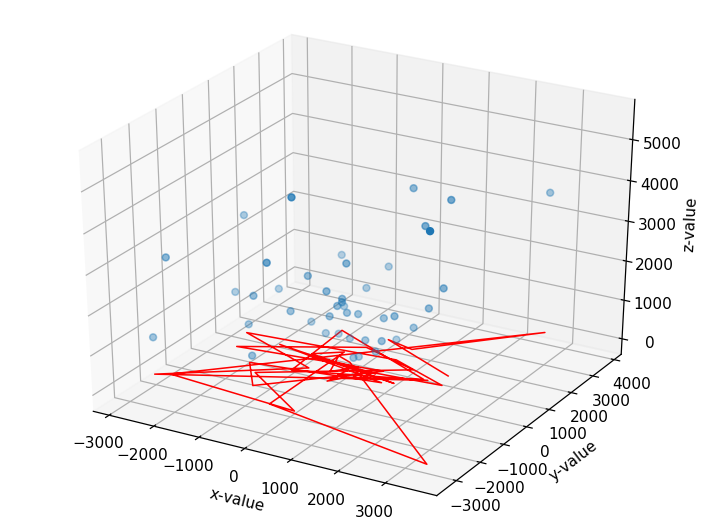

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt
import numpy as np
import pandas as pd
import os
%matplotlib notebook
d = pd.read_csv("3D.csv")

#相対パスでは.が現在のパスを明示的に示す方法。 ..で、一つ上の階層を示すなどが使える。
#データをarray型に
x = np.array(d["x"])
y = np.array(d["y"])
z = np.array(d["z"])

# グラフ作成
fig = plt.figure() #新規のｳｨﾝﾄﾞｳを描画
ax = Axes3D(fig)

ax.scatter(x, y, z) #scatter 散布図
plt.plot(x,y,linewidth=1,color='r')
#軸ラベルの設定
ax.set_xlabel("x-value")
ax.set_ylabel("y-value")
ax.set_zlabel("z-value")

plt.show()